In [1]:
#menghubungkan colab dengan gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#memanggil dataset lewat gdrive
path = "/content/drive/MyDrive/praktikum/praktikum03"

In [9]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# baca dataset
df = pd.read_csv(path + "/data/day.csv", sep=',')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
# ambil kolom yang dibutuhkan
# Y = cnt (jumlah peminjaman)
# X = suhu (temp), kelembapan (hum), kecepatan angin (windspeed)
X = df[['temp', 'hum', 'windspeed']]
y = df['cnt']

In [14]:
# bagi data jadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 584
Jumlah data testing: 147


In [15]:
# buat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# prediksi data testing
y_pred = model.predict(X_test)

In [16]:
# tampilkan koefisien dan intercept
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)

Koefisien: [ 6589.71492487 -2995.74397695 -4153.0138785 ]
Intercept: 3947.751945201843


In [17]:
# evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1196.956055531855
Mean Squared Error (MSE): 2020722.2320442528
R² Score: 0.49606445111931263


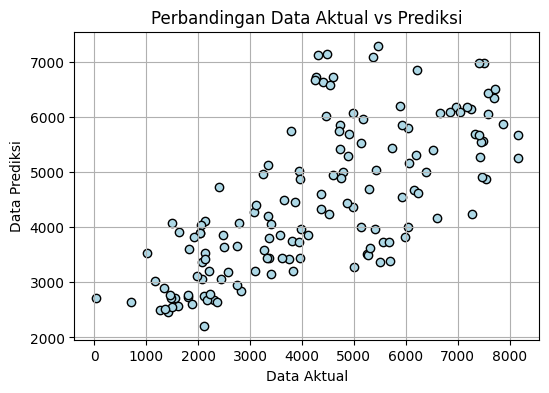

In [19]:
# visualisasi hasil prediksi
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='lightblue', edgecolor='black')
plt.xlabel('Data Aktual')
plt.ylabel('Data Prediksi')
plt.title('Perbandingan Data Aktual vs Prediksi')
plt.grid(True)
plt.show()
